In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import prince

pd.set_option('display.max_columns', None)

In [2]:
# read CSV
df=pd.read_csv("unified_csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 4050 non-null   object 
 1   status                                       4050 non-null   object 
 2   category_group_list                          4050 non-null   object 
 3   num_funding_rounds                           4050 non-null   float64
 4   total_funding_usd                            4050 non-null   float64
 5   founded_on                                   4050 non-null   float64
 6   employee_count                               4050 non-null   object 
 7   cat_commerce_shopping                        4050 non-null   float64
 8   cat_fin_services                             4050 non-null   float64
 9   cat_lending_invests                          4050 non-null   float64
 10  

In [3]:
list(df)

['company_name',
 'status',
 'category_group_list',
 'num_funding_rounds',
 'total_funding_usd',
 'founded_on',
 'employee_count',
 'cat_commerce_shopping',
 'cat_fin_services',
 'cat_lending_invests',
 'cat_payments',
 'fd_rd_latest_investment',
 'fd_rd_investment_type_series_unknown',
 'fd_rd_investment_type_grant',
 'fd_rd_investment_type_debt_financing',
 'fd_rd_investment_type_pre_seed',
 'fd_rd_investment_type_post_ipo_equity',
 'fd_rd_investment_type_convertible_note',
 'fd_rd_investment_type_equity_crowdfunding',
 'fd_rd_investment_type_private_equity',
 'fd_rd_investment_type_undisclosed',
 'fd_rd_investment_type_post_ipo_debt',
 'fd_rd_investment_type_corporate_round',
 'fd_rd_investment_type_product_crowdfunding',
 'fd_rd_investment_type_non_equity_assistance',
 'fd_rd_investment_type_initial_coin_offering',
 'fd_rd_investment_type_secondary_market',
 'fd_rd_investment_type_post_ipo_secondary',
 'fd_rd_num_invested_by_top_100',
 'event_count',
 'job_duration',
 'gender_male'

In [4]:
keep_col = [
    # 'company_name',
    # 'status',
    # 'category_group_list',
    'num_funding_rounds',
    'total_funding_usd',
    'founded_on',
    'employee_count',
    'cat_commerce_shopping',
    'cat_fin_services',
    'cat_lending_invests',
    'cat_payments',
    'fd_rd_latest_investment',
    # 'fd_rd_investment_type_series_unknown',
    # 'fd_rd_investment_type_grant',
    # 'fd_rd_investment_type_debt_financing',
    # 'fd_rd_investment_type_pre_seed',
    # 'fd_rd_investment_type_post_ipo_equity',
    # 'fd_rd_investment_type_convertible_note',
    # 'fd_rd_investment_type_equity_crowdfunding',
    # 'fd_rd_investment_type_private_equity',
    # 'fd_rd_investment_type_undisclosed',
    # 'fd_rd_investment_type_post_ipo_debt',
    # 'fd_rd_investment_type_corporate_round',
    # 'fd_rd_investment_type_product_crowdfunding',
    # 'fd_rd_investment_type_non_equity_assistance',
    # 'fd_rd_investment_type_initial_coin_offering',
    # 'fd_rd_investment_type_secondary_market',
    # 'fd_rd_investment_type_post_ipo_secondary',
    'fd_rd_num_invested_by_top_100',
    'event_count',
    'job_duration',
    'gender_male',
    'gender_female',
    'degree_type',
    'subject_Business',
    'subject_STEM',
    'subject_Arts_SoSc',
    'num_exec',
    'first_fund_raised',
    'first_fund_post_money',
    'first_fund_investor_count',
    'has_parent',
    'continent_NA',
    'continent_EU',
    'continent_AS',
    'continent_SA',
    # 'continent_AF',
    # 'continent_OC',
    'country_code_USA',
    'country_code_GBR',
    'country_code_IND',
    'country_code_CHN',
    # 'country_code_CAN',
    # 'country_code_SGP',
    # 'country_code_AUS',
    # 'country_code_DEU',
    # 'country_code_BRA',
    # 'country_code_CHE',
    # 'country_code_ESP',
    # 'country_code_FRA',
    # 'country_code_NLD',
    # 'country_code_HKG',
    # 'country_code_ISR',
    # 'country_code_KOR',
    # 'country_code_SWE',
    # 'country_code_JPN',
    # 'country_code_MEX',
    # 'country_code_IDN',
    'city_London',
    'city_New York',
    'city_San Francisco',
    'city_Singapore',
    'city_Toronto',
    'city_Beijing',
    # 'city_Mumbai',
    # 'city_Los Angeles',
    # 'city_Chicago',
    # 'city_Sydney',
    # 'city_Paris',
    # 'city_São Paulo',
    # 'city_Tokyo',
    # 'city_Berlin',
    # 'city_Boston',
    # 'city_Stockholm',
    # 'city_Shanghai',
    # 'city_Tel Aviv',
    # 'city_Amsterdam',
    # 'city_Madrid',
    'status_operating',
    'status_exited',
    'status_closed',
    'has_acquisitions',
    'has_ipo',
    'average_change_in_funds',
    'average_momentum',
    'latest_momentum'
]

df = df[keep_col]

In [5]:
df.drop(columns='employee_count', inplace=True)
df.insert(df.columns.get_loc('first_fund_raised'),column='first_fund_raised_log',value=np.log(df['first_fund_raised']))
df.drop(columns=['first_fund_raised'], inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [6]:
df.head()

,num_funding_rounds,total_funding_usd,founded_on,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised_log,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,status_operating,status_exited,status_closed,has_acquisitions,has_ipo,average_change_in_funds,average_momentum,latest_momentum
0,3.0,4025000.0,4.0767,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5.9945,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,15.068274,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.478261,2.964229,2.964229
1,5.0,13316538.0,8.7507,1.0,1.0,0.0,1.0,1.0,0.0,1.0,33.0767,0.833333,0.166667,0.333333,0.166667,0.000000,0.000000,6.0,14.421009,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.557546,0.934681,0.331667
2,5.0,57011648.0,6.0795,0.0,1.0,0.0,0.0,3.0,2.0,0.0,52.3534,1.000000,0.000000,0.727273,0.545455,0.000000,0.000000,11.0,0.000000,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.579845,0.825104,1.801594
3,10.0,3180350.0,4.7068,0.0,1.0,0.0,0.0,2.0,1.0,3.0,55.2630,0.842105,0.157895,0.526316,0.052632,0.263158,0.052632,19.0,13.981322,0.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.515446,0.228600,0.228600
4,4.0,5700000.0,10.4164,1.0,0.0,0.0,0.0,2.0,0.0,0.0,59.6986,1.000000,0.000000,1.000000,0.166667,0.333333,0.000000,6.0,14.557448,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.908425,0.341418,0.298739


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   num_funding_rounds             4050 non-null   float64
 1   total_funding_usd              4050 non-null   float64
 2   founded_on                     4050 non-null   float64
 3   cat_commerce_shopping          4050 non-null   float64
 4   cat_fin_services               4050 non-null   float64
 5   cat_lending_invests            4050 non-null   float64
 6   cat_payments                   4050 non-null   float64
 7   fd_rd_latest_investment        4050 non-null   float64
 8   fd_rd_num_invested_by_top_100  4050 non-null   float64
 9   event_count                    4050 non-null   float64
 10  job_duration                   4050 non-null   float64
 11  gender_male                    4050 non-null   float64
 12  gender_female                  4050 non-null   f

In [8]:
X = df.iloc[:, :-8]
y = df.iloc[:, -2]
final_y = y
final_y

0       2.964229
1       0.934681
2       0.825104
3       0.228600
4       0.341418
          ...   
4045    1.008996
4046    1.521582
4047    1.498871
4048    0.476957
4049    2.047393
Name: average_momentum, Length: 4050, dtype: float64

In [9]:
X_minmax = MinMaxScaler().fit_transform(X)

y = pd.qcut(y, 5, labels=[0,1,2,3,4])

[]

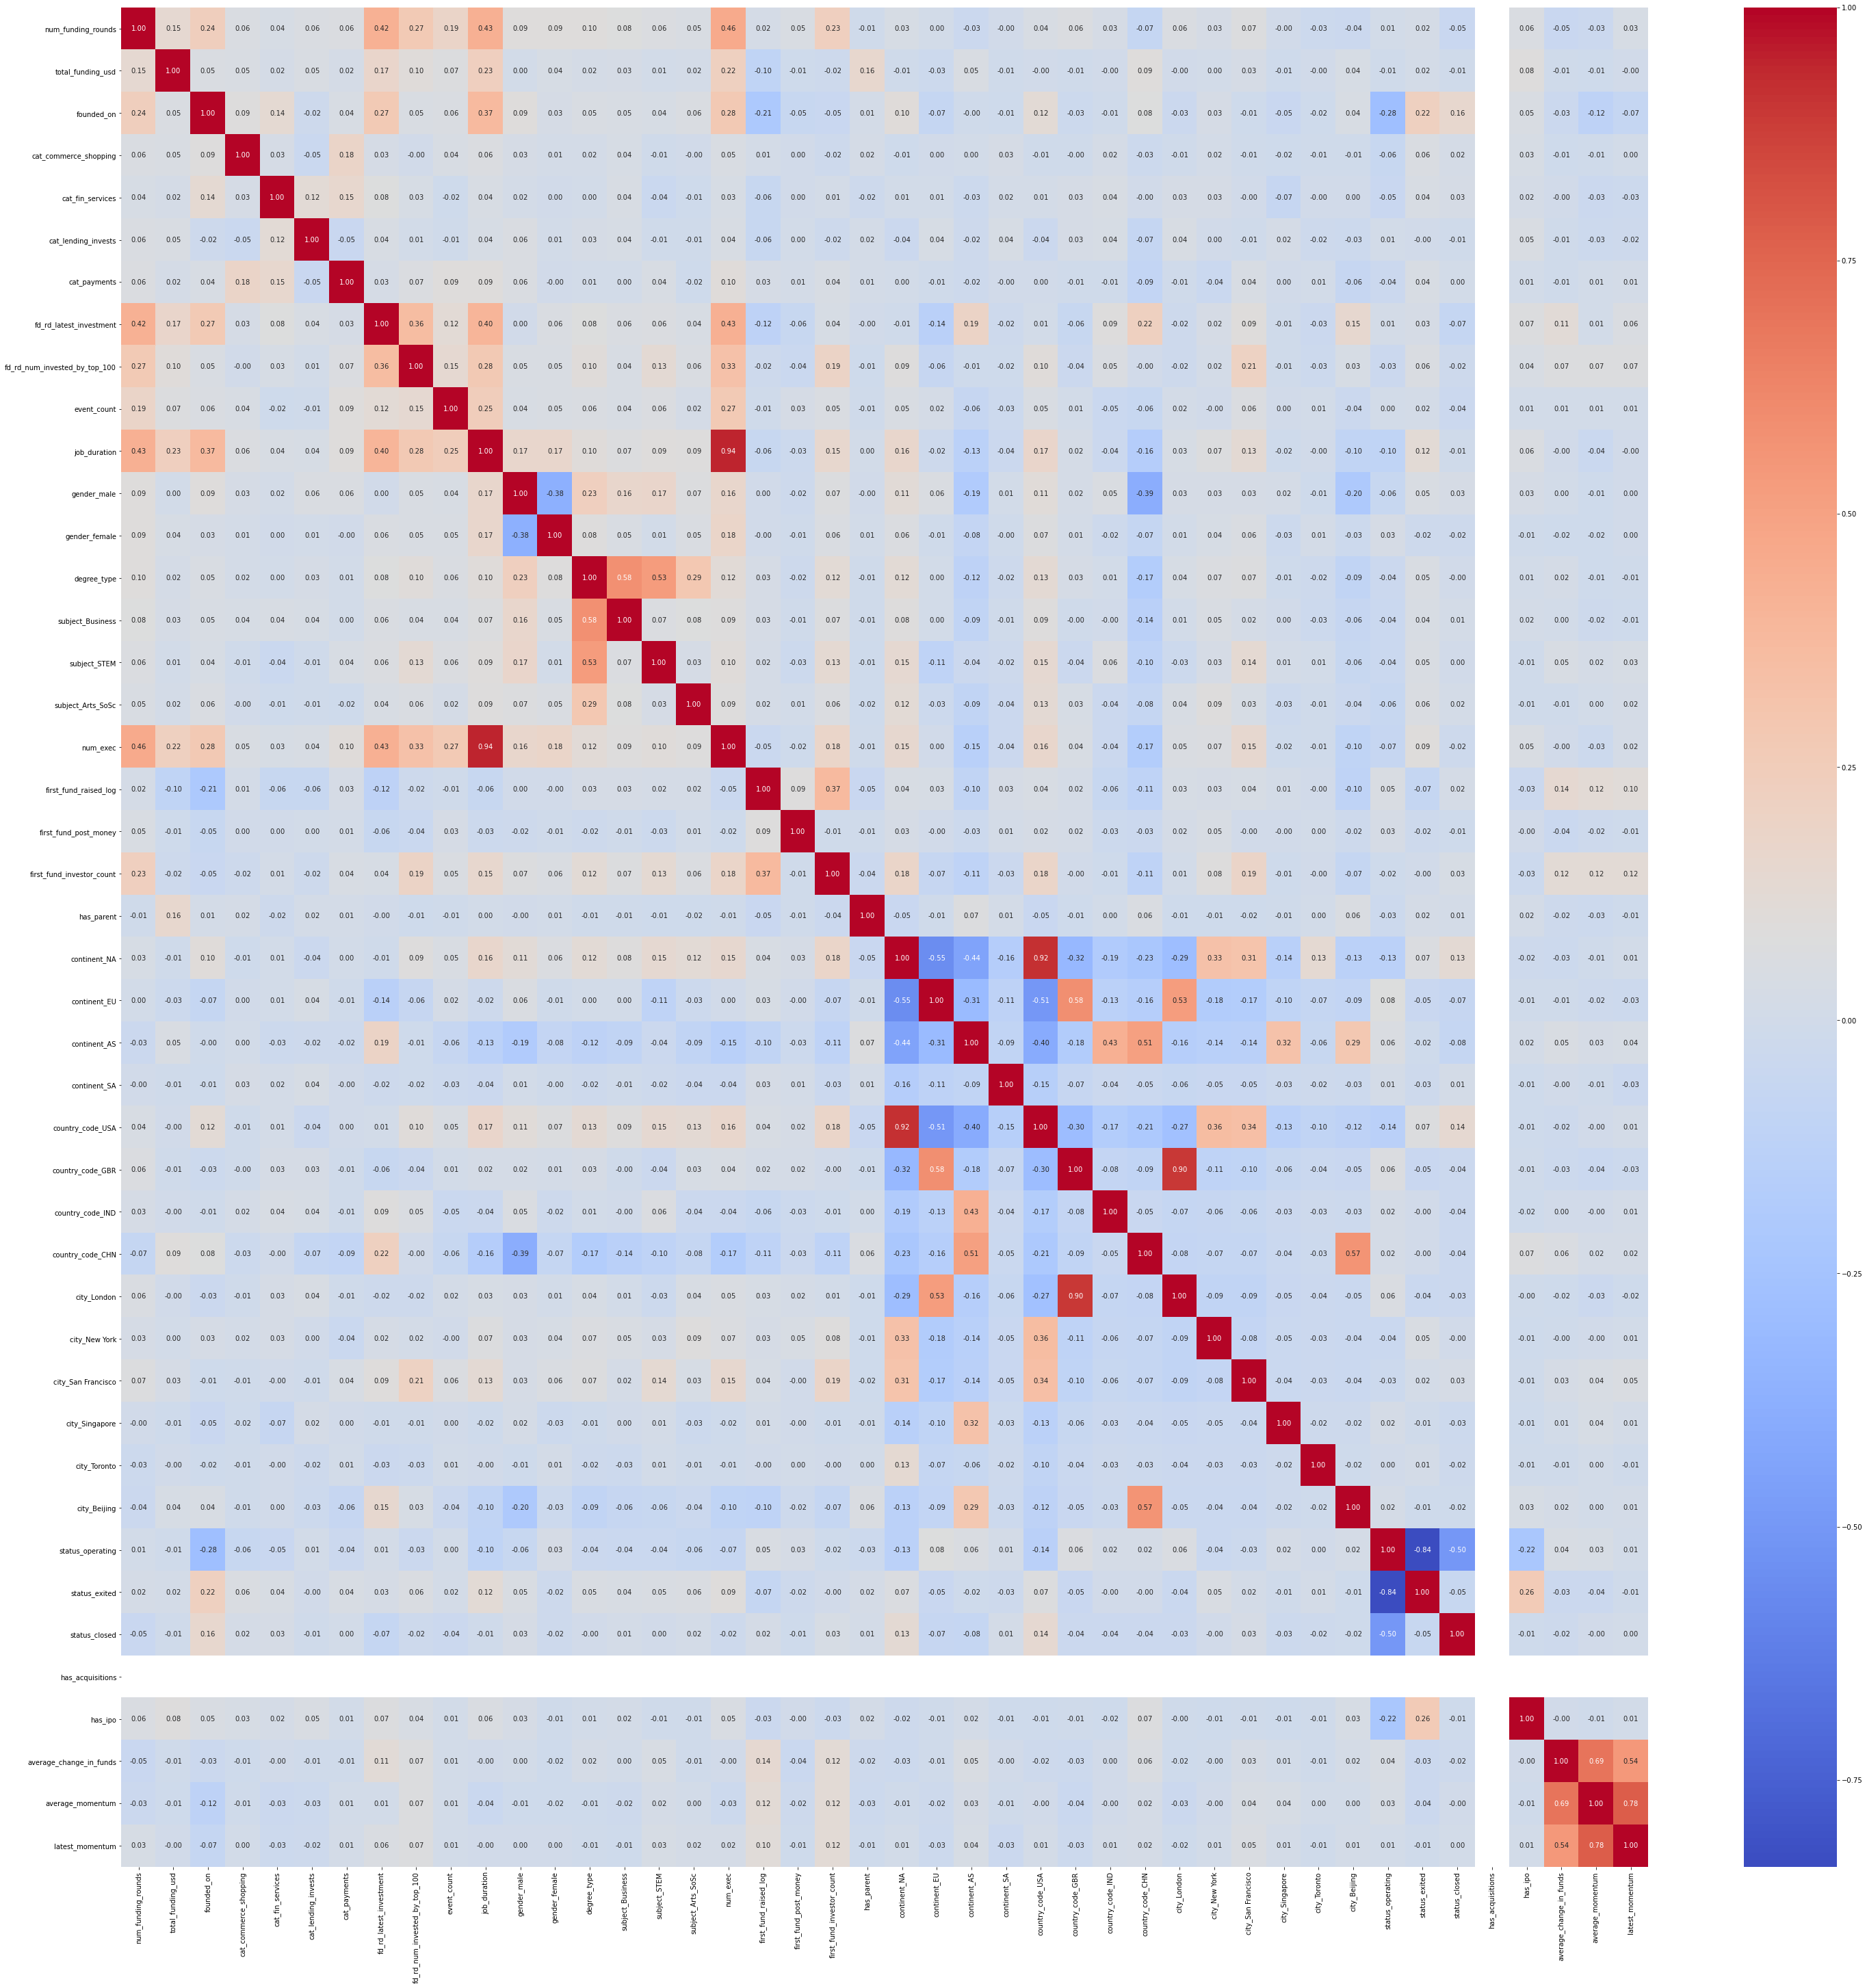

In [10]:
corrmat = df.corr()
plt.figure(figsize = (50, 50))
sns.heatmap(df[corrmat.index].corr(), annot=True, fmt='.2f', cmap='coolwarm')
# sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.plot()

In [11]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                        Specs         Score
1           total_funding_usd  2.292100e+10
19      first_fund_post_money  6.135332e+08
10               job_duration  4.478248e+03
17                   num_exec  7.390623e+02
20  first_fund_investor_count  6.630053e+02
18      first_fund_raised_log  3.769481e+02
2                  founded_on  2.165003e+02
7     fd_rd_latest_investment  2.028554e+02
9                 event_count  1.272824e+02
0          num_funding_rounds  7.423144e+01


[0.05441871 0.07482696 0.08150543 0.01899645 0.0086938  0.02488013
 0.02692674 0.04360323 0.02022558 0.03716209 0.06304723 0.03714369
 0.03487612 0.048978   0.04210176 0.03866589 0.02561704 0.05498341
 0.06688884 0.02138609 0.05668871 0.00431024 0.01289672 0.0141081
 0.01136237 0.0060946  0.01311571 0.008531   0.0062187  0.00392248
 0.00711384 0.01115441 0.00803721 0.00496945 0.00326887 0.00328039]


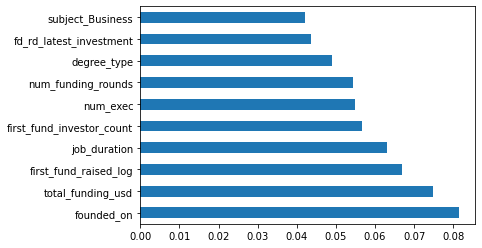

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_minmax,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

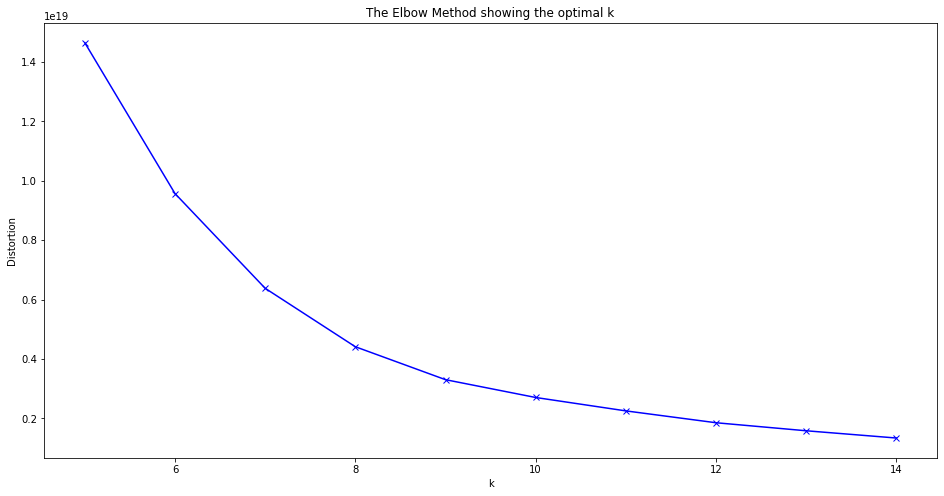

In [13]:
# elbow plot
distortions = []
# K = range(1, 10)
K = range(5, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

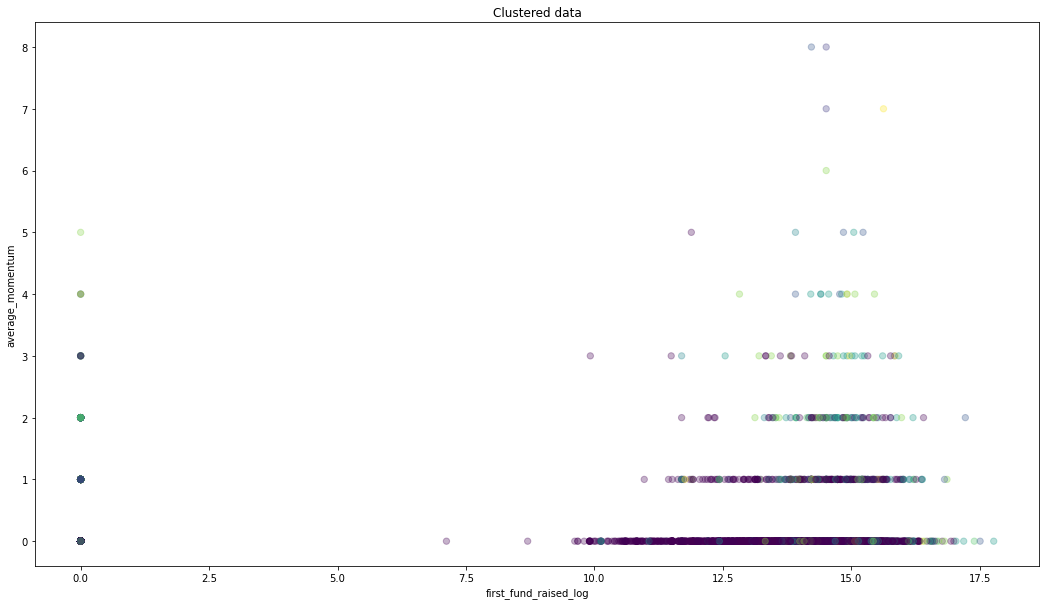

In [14]:
# This is to show that vanilla K-Means clustering does not work
kmeans = KMeans(n_clusters=12).fit(X.astype(float))
centroids = kmeans.cluster_centers_
# centroids

plt.figure(figsize=(18,10))
plt.scatter(X['first_fund_raised_log'], X['fd_rd_num_invested_by_top_100'], c = kmeans.labels_.astype(float), s = 40, alpha = 0.3)
# plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s = 30)
plt.title("Clustered data")
plt.xlabel("first_fund_raised_log")
plt.ylabel("average_momentum")
plt.show()

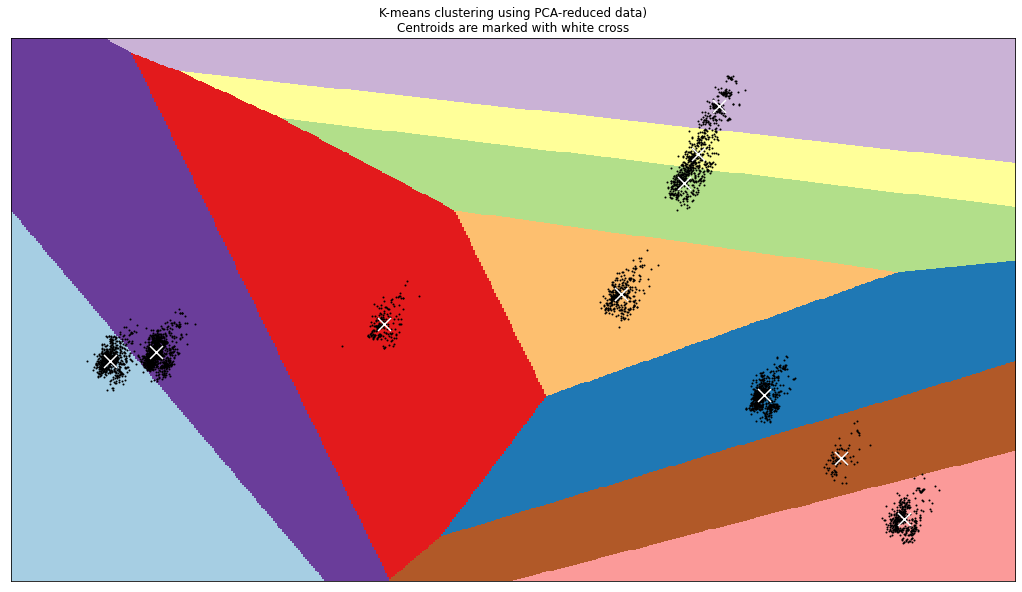

In [15]:
data = X_minmax
plt.figure(figsize=(18,10))

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .005     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.2, reduced_data[:, 0].max() + 0.2
y_min, y_max = reduced_data[:, 1].min() - 0.2, reduced_data[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering using PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [16]:
# pca.components_

In [17]:
arr = []
for n in range(2, 9):
    pca = PCA(n_components=n)
    reduced_data = pca.fit_transform(data)
    print("n = " + str(n) + ":")
    # print("Explained variance = " + str(pca.explained_variance_))
    print("Explained variance ratio = " + str(pca.explained_variance_ratio_))
    print("Total explaineed variance ratio = " + str(pca.explained_variance_ratio_.sum()))
    arr.append(pca.explained_variance_ratio_.sum())

n = 2:
Explained variance ratio = [0.26522563 0.13293268]
Total explaineed variance ratio = 0.3981583048795515
n = 3:
Explained variance ratio = [0.26522563 0.13293268 0.09744599]
Total explaineed variance ratio = 0.49560429077960155
n = 4:
Explained variance ratio = [0.26522563 0.13293268 0.09744598 0.0764437 ]
Total explaineed variance ratio = 0.5720479797525841
n = 5:
Explained variance ratio = [0.26522563 0.13293268 0.09744598 0.07644373 0.0516572 ]
Total explaineed variance ratio = 0.6237052172022908
n = 6:
Explained variance ratio = [0.26522563 0.13293268 0.09744598 0.07644373 0.05165668 0.04801861]
Total explaineed variance ratio = 0.6717233110198956
n = 7:
Explained variance ratio = [0.26522563 0.13293268 0.09744599 0.07644373 0.05165727 0.04801929
 0.04636713]
Total explaineed variance ratio = 0.7180917178516066
n = 8:
Explained variance ratio = [0.26522563 0.13293268 0.09744599 0.07644373 0.05165727 0.04801935
 0.04636693 0.04152455]
Total explaineed variance ratio = 0.759616

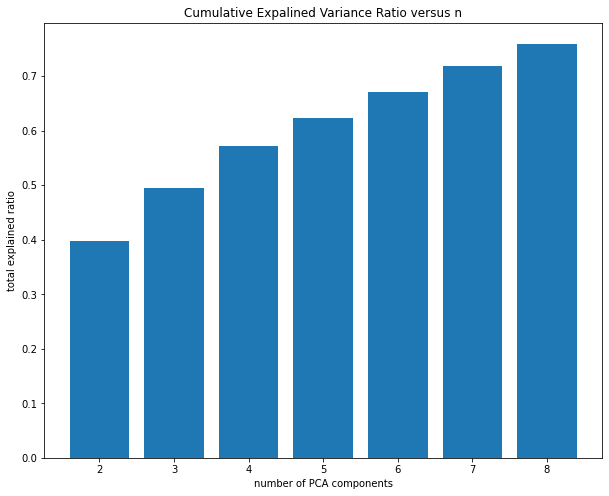

In [18]:
plt.figure(figsize=(10,8))
plt.bar(range(2, 9), arr)
plt.xlabel('number of PCA components')
plt.ylabel('total explained ratio')
plt.title('Cumulative Expalined Variance Ratio versus n')
plt.show()

In [19]:
pca = prince.PCA(
     n_components=14,
     n_iter=10,
     rescale_with_mean=False,
     rescale_with_std=False,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=0
 )

pca = pca.fit(X_minmax)

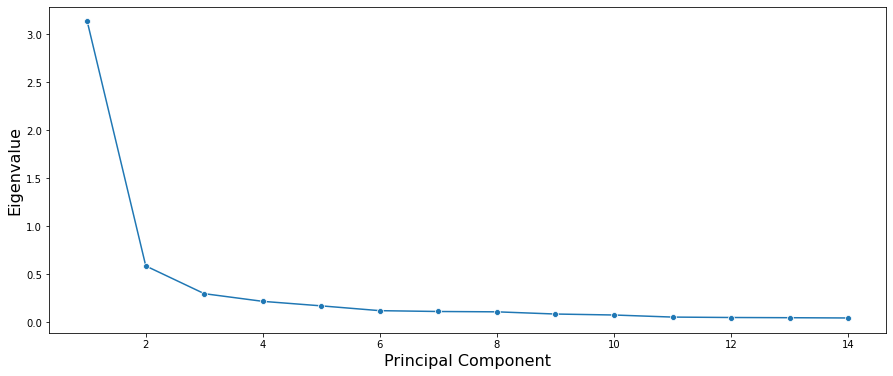

In [20]:
dset = pd.DataFrame()
dset['pca'] = range(1,15)
dset['eigenvalue'] = pd.DataFrame(pca.eigenvalues_)
plt.figure(figsize=(15,6))
sns.lineplot(x='pca', y='eigenvalue', marker="o", data=dset)
plt.ylabel('Eigenvalue', fontsize=16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

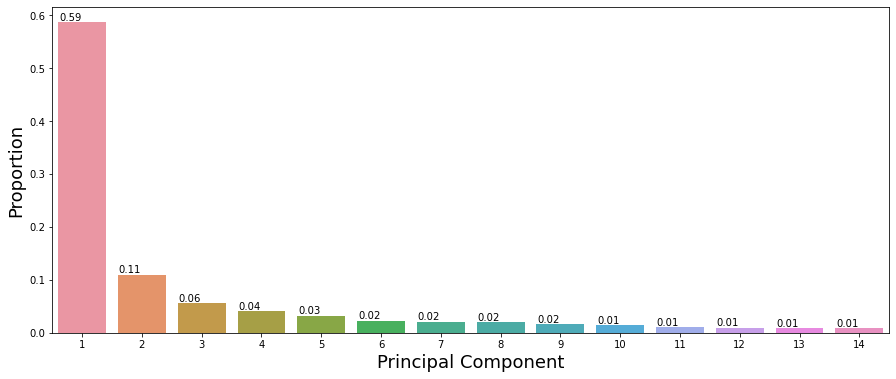

In [21]:
dset = pd.DataFrame()
dset['pca'] = range(1,15)
dset['vari'] = pd.DataFrame(pca.explained_inertia_)

plt.figure(figsize=(15,6))
graph = sns.barplot(x='pca', y='vari', data=dset)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

In [22]:
# num_components_chosen = 10
pca_df = pca.transform(X_minmax)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.137813,-0.780000,-0.200986,-0.587759,0.543521,-0.371781,-0.114490,0.075518,-0.196669,0.673077,-0.297000,0.000558,-0.079071,0.385097
1,1.908024,0.885759,-0.120699,0.900737,-0.048921,-0.081058,0.668480,0.352155,0.384014,0.052475,-0.134266,0.060598,-0.000683,-0.152353
2,1.409990,0.730879,-0.278345,-0.197303,-0.168415,0.420401,0.423705,-0.562188,0.361538,0.065891,-0.208944,-0.043904,-0.006015,0.043277
3,1.563373,0.768692,-0.306119,-0.195418,-0.364247,-0.279030,0.265750,-0.240197,0.373219,0.063610,-0.187030,-0.076847,0.039178,-0.052023
4,1.292912,0.420707,0.782228,-0.052618,-0.430533,0.036902,0.756326,0.544626,-0.604050,0.083256,-0.191075,0.436274,0.483742,-0.483478


In [23]:
pca.column_correlations(X_minmax).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.215285,-0.004136,-0.025917,0.025848,0.061825,0.110265,-0.005168,0.036277,-0.032986,0.064300,-0.038650,-0.019298,0.402948,-0.163143
1,0.021140,0.003469,0.057741,0.001298,0.062466,0.123973,-0.003831,0.027528,0.021732,0.032311,-0.036368,0.037146,0.087743,0.010561
2,0.316330,-0.080834,0.069653,0.019504,-0.003368,0.458789,0.060372,-0.035311,0.207913,0.020741,0.163546,0.157524,0.451896,-0.383828
3,0.149726,0.031551,0.058742,0.345546,0.032177,0.192925,0.592818,0.685055,-0.084397,0.060449,-0.011862,0.013905,-0.036570,0.018854
4,0.402833,0.049811,0.042710,0.056517,0.163829,0.134730,-0.085600,-0.007629,0.251966,-0.037714,0.225561,-0.365031,-0.238131,0.305168


In [24]:
pca_df = MinMaxScaler().fit_transform(pca_df)
pca_df = pd.DataFrame(pca_df)

In [25]:
final_pca_df = pca_df.join(final_y)
final_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,average_momentum
0,0.792725,0.119041,0.350412,0.135754,0.658558,0.207952,0.442379,0.372762,0.383978,0.905582,0.231872,0.467814,0.300058,0.768222,2.964229
1,0.688938,0.788974,0.383230,0.949264,0.312911,0.366824,0.817029,0.502856,0.679296,0.521555,0.346551,0.502536,0.347056,0.378601,0.934681
2,0.463995,0.726685,0.318790,0.349151,0.243195,0.640857,0.699904,0.072867,0.667865,0.529856,0.293925,0.442101,0.343859,0.520422,0.825104
3,0.533272,0.741892,0.307438,0.350181,0.128941,0.258638,0.624323,0.224290,0.673805,0.528445,0.309367,0.423050,0.370955,0.451334,0.228600
4,0.411115,0.601940,0.752315,0.428226,0.090268,0.431286,0.859063,0.593370,0.176797,0.540602,0.306517,0.719792,0.637498,0.138554,0.341418


In [26]:
# final_pca_df.to_csv('unified_csv_with_pca.csv', index=False)